In [26]:
install.packages("grf")

Warning message in install.packages("grf"):
“installation of package ‘grf’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [27]:
library('grf')

Warning message:
“package ‘grf’ was built under R version 3.6.3”

In [28]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.16

Matrix products: default
BLAS/LAPACK: /Users/dianedou/opt/anaconda3/envs/r-environment/lib/R/lib/libRblas.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] grf_1.2.0

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1        lattice_0.20-38   digest_0.6.18     crayon_1.3.4     
 [5] IRdisplay_0.7.0   repr_0.19.2       grid_3.6.1        jsonlite_1.6     
 [9] evaluate_0.13     uuid_0.1-2        Matrix_1.2-17     IRkernel_0.8.15  
[13] tools_3.6.1       compiler_3.6.1    DiceKriging_1.6.0 base64enc_0.1-3  
[17] htmltools_0.3.6   pbdZMQ_0.3-3     

In [10]:
data_outcome <- read.csv(file = '/Users/dianedou/Downloads/matching_attributes_v2.csv')
data_intervention <- read.csv(file = '/Users/dianedou/Downloads/matching_attributes_v2.csv')

In [12]:
X = data_outcome[, c(2:27)]
Y = data_outcome[,c('reporting_gtv_l28')]
W = data_outcome[,c('variant')]

In [3]:
# tau.forest <- causal_forest(X, Y, W)

In [13]:
forest.W <- regression_forest(X, W, tune.parameters = "all")

In [14]:
W.hat <- predict(forest.W)$predictions

In [15]:
forest.Y <- regression_forest(X, Y, tune.parameters = "all")

In [16]:
Y.hat <- predict(forest.Y)$predictions

In [17]:
forest.Y.varimp <- variable_importance(forest.Y)

In [ ]:
# Note: Forests may have a hard time when trained on very few variables
# (e.g., ncol(X) = 1, 2, or 3). We recommend not being too aggressive
# in selection.

# selected.vars <- which(forest.Y.varimp / mean(forest.Y.varimp) > 0.2)


In [18]:
tau.forest <- causal_forest(X, Y, W, #X[, selected.vars]
                            W.hat = W.hat, Y.hat = Y.hat,
                            tune.parameters = "all")

In [19]:
average_treatment_effect(tau.forest, target.sample = "treated")

Warning message in average_treatment_effect(tau.forest, target.sample = "treated"):
“Estimated treatment propensities take values between 0.001 and 1 and in particular get very close to 0 and 1. In this case, using `target.sample=overlap`, or filtering data as in Crump, Hotz, Imbens, and Mitnik (Biometrika, 2009) may be helpful.”

estimate   std.err 
90.905059  3.391235

In [2]:
# Estimate the conditional average treatment effect on the full sample (CATE).
average_treatment_effect(tau.forest, target.sample = "all")

In [3]:
# See if the causal forest succeeded in capturing heterogeneity by plotting
# the TOC and calculating a 95% CI for the AUTOC.
rate <- rank_average_treatment_effect(tau.forest, predict(tau.forest)$predictions)

In [4]:
plot(rate)

In [5]:
paste("AUTOC:", round(rate$estimate, 2), "+/", round(1.96 * rate$std.err, 2))

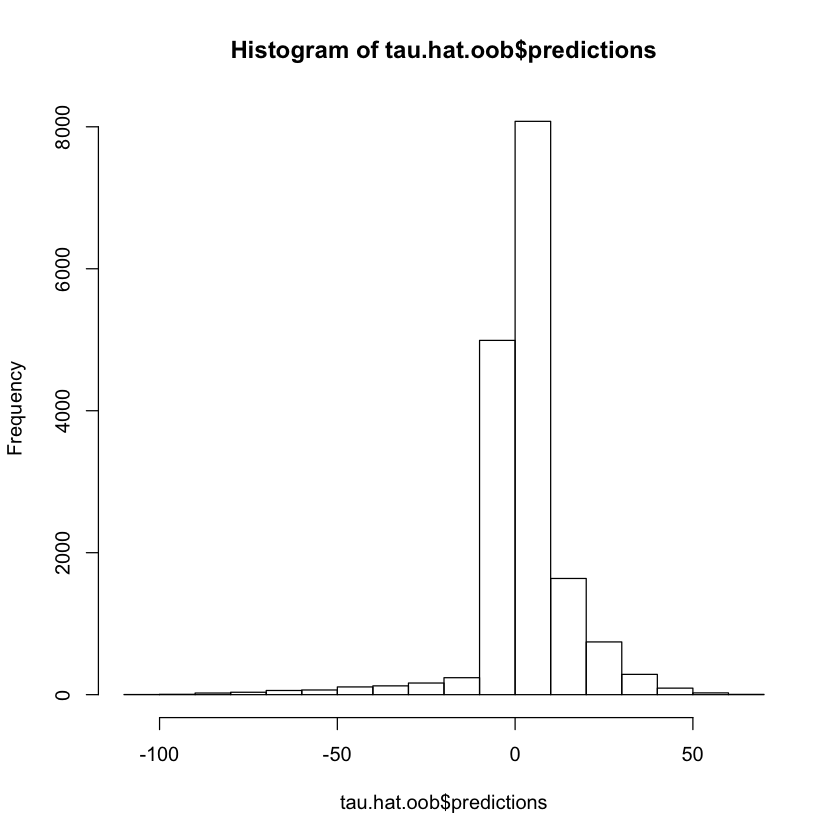

In [4]:
# Estimate treatment effects for the training data using out-of-bag prediction.
tau.hat.oob <- predict(tau.forest)
hist(tau.hat.oob$predictions)